In [1]:
# HEL 8048 UiT Exam
# Candidate No: 19

# GitHub repository: https://github.com/nikitamitkin/Exam-HEL8048.git

# License: MIT

In [2]:
# Data used:

# Dataset 'Alcohol Consumption by Country' 
# Source: https://www.kaggle.com/datasets/pralabhpoudel/alcohol-consumption-by-country/data

In [3]:
# About dataset:

# Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded alcohol) 
# amount of alcohol consumed per person (15 years of age or older) 
# over a calendar year, in litres of pure alcohol, adjusted for tourist consumption.

# Statistical concept and methodology: 
# The estimates for the total alcohol consumption are produced by summing up the 3-year average per capita (15+) 
# recorded alcohol consumption and an estimate of per capita (15+) unrecorded alcohol consumption for a calendar year. 

# Tourist consumption takes into account tourists visiting the country and inhabitants visiting other countries.

# Variable time span: 2000 – 2018

# Original data taken from: https://ourworldindata.org/alcohol-consumption

In [4]:
# Objectives of this project are:
# 1) to assess the change in global alcohol consumption level around the world
# 2) to investagete the contruies and regions that made the highest impact to this change
# 3) to add data from external source
# 4) to investigate association between drinking and GDP per capita 

In [5]:
# Libraries importing:

import pandas as pd
import numpy as np

In [6]:
# Lets make a function for data loading

def load_data(source, file_path=None, url=None):
    """
    Load data from a file or a URL.
    
    Parameters:
    - source (str): Type of source 'file' or 'url'
    - file_path (str): Path to the file if source is 'file'.
    - url (str): URL to the file if source is 'url'.
    
    Returns:
    - df (DataFrame): Loaded data as a pandas DataFrame.
    """
    if source == 'file':
        df = pd.read_csv(file_path)
    elif source == 'url':
        df = pd.read_csv(url)
    else:
        raise ValueError("Source must be 'file' or 'url'")
    
    return df

In [7]:
# Using function to read the data:
# This function assumes CSV format and expects a path to the CSV file as input
# It returns a pandas DataFrame loaded with the CSV data


df = load_data('file', file_path=r"C:\Users\NikitaMitkin\Documents\GitHub\HEL8048\data\dataset.csv")

In [8]:
# Let's look at our data:

df

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
...,...,...,...,...,...,...,...
57079,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57080,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57081,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57082,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [9]:
df.shape

(57084, 7)

In [10]:
# We have 57 084 observations and 7 variables

In [11]:
# Ok. Our variables' names looks too large and awful for further analysis,
# Let's rename them:

df.rename(columns={
    'Entity': 'country',
    'Code': 'country_Code',
    'Year': 'year',
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'alcohol_consumption_per_capita',
    'GDP per capita, PPP (constant 2017 international $)': 'gdp_per_capita_ppp',
    'Population (historical estimates)': 'population',
    'Continent': 'continent'
}, inplace=True)

df

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
...,...,...,...,...,...,...,...
57079,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57080,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57081,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57082,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [12]:
# Nice!

# Let's look at data types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57084 entries, 0 to 57083
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         57084 non-null  object 
 1   country_Code                    54099 non-null  object 
 2   year                            57084 non-null  int64  
 3   alcohol_consumption_per_capita  1164 non-null   float64
 4   gdp_per_capita_ppp              7109 non-null   float64
 5   population                      55656 non-null  float64
 6   continent                       285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [13]:
# Let's look at summary statistis for numerical variables:

df.describe()

,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population
count,57084.000000,1164.000000,7109.000000,5.565600e+04
mean,1613.923324,6.041385,16938.108581,3.246352e+07
std,1400.177983,4.080525,19167.650695,2.503028e+08
min,-10000.000000,0.000000,1.960152,1.000000e+00
25%,1833.000000,2.545000,3560.617694,1.338740e+05
50%,1903.000000,5.655406,9948.266898,1.218570e+06
75%,1969.000000,9.190000,23194.223956,5.396250e+06
max,2021.000000,20.500000,161971.034870,7.874966e+09


In [14]:
# Ok. Global alcohol consumption is 6.08 L per year per capita.

# Now, let's look at summary for categorical variables:

df.describe(include=['O'])

,country,country_Code,continent
count,57084,54099,285
unique,339,286,7
top,Lithuania,MWI,Europe
freq,259,259,75


In [15]:
# Ensure the directory exists
graphs_dir = "graphs"

In [16]:
# Make a Class to briefly see summary statistics for variable and its distribution

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

class DataAnalyzer:
    def __init__(self, dataframe):
        """
        Initialize the DataAnalyzer with a pandas DataFrame.
        
        Parameters:
        - dataframe (DataFrame): A pandas DataFrame to analyze.
        """
        self.df = dataframe.replace([np.inf, -np.inf], np.nan)
    
    def summarize_data(self, column):
        """
        Generate summary statistics for a specified column in the dataframe.
        
        Parameters:
        - column (str): Column name for which to generate summary statistics.
        
        Returns:
        - (Series): Summary statistics of the specified column.
        """
        return self.df[column].describe()
    
    def plot_histogram_with_kde(self, column, color='skyblue', edge_color='white'):
        """
        Plot histogram with KDE overlay for the specified column and display summary statistics.
        
        Parameters:
        - column (str): Column name for which to plot the histogram with KDE.
        - color (str): Color of the histogram bars.
        - edge_color (str): Color of the edges of the histogram bars.
        """
        # Display summary statistics
        print(f"Summary Statistics for {column}:\n{self.summarize_data(column)}\n")

        # Plot histogram with KDE overlay
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df[column], kde=True, color=color, edgecolor=edge_color, linewidth=1.5, stat="density")
        plt.title(f'Distribution of {column} with Density Estimation')
        plt.xlabel(f'{column} Value')
        plt.ylabel('Density')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.axvline(self.df[column].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean line
        plt.axvline(self.df[column].median(), color='green', linestyle='dashdot', linewidth=1)  # Median line
        plt.legend(['KDE', 'Mean', 'Median'])
        plt.savefig(f"{graphs_dir}/class_plot.png")
        plt.show()

Summary Statistics for alcohol_consumption_per_capita:
count    1164.000000
mean        6.041385
std         4.080525
min         0.000000
25%         2.545000
50%         5.655406
75%         9.190000
max        20.500000
Name: alcohol_consumption_per_capita, dtype: float64



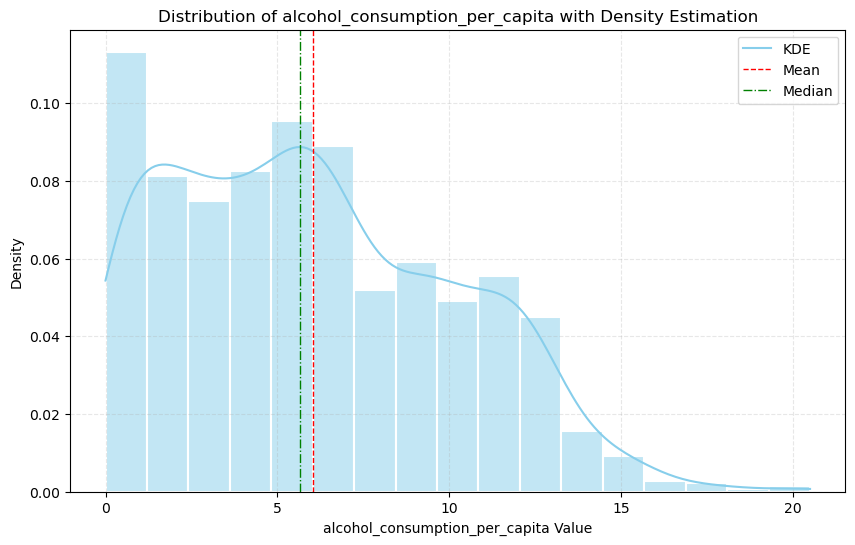

In [17]:
# Example usage
analyzer = DataAnalyzer(df)
analyzer.plot_histogram_with_kde('alcohol_consumption_per_capita')

Summary Statistics for gdp_per_capita_ppp:
count      7109.000000
mean      16938.108581
std       19167.650695
min           1.960152
25%        3560.617694
50%        9948.266898
75%       23194.223956
max      161971.034870
Name: gdp_per_capita_ppp, dtype: float64



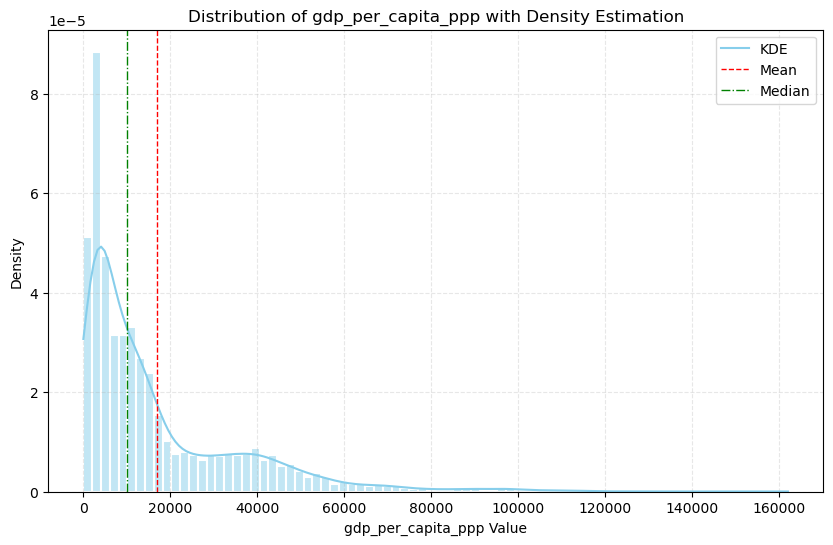

In [18]:
analyzer.plot_histogram_with_kde('gdp_per_capita_ppp')

In [19]:
# Remove duplicate rows for the same 'country' and 'year' and keep only the first occurrence
df = df.drop_duplicates(subset=['country', 'year'], keep='first')

In [20]:
# check for duplicates 
duplicates = df.duplicated(subset=['country', 'year'], keep=False)
print(f"Duplicate entries still present: {duplicates.any()}")

# ok. no duplicates

Duplicate entries still present: False


In [21]:
# See missed values:

df.isna().mean()

country                           0.000000
country_Code                      0.052291
year                              0.000000
alcohol_consumption_per_capita    0.979609
gdp_per_capita_ppp                0.875464
population                        0.025016
continent                         0.995007
dtype: float64

In [22]:
# Wow! We see huge (99.5%) missed data on continent for our contries.
# let's deal with it:

In [23]:
# Fill missing continent data based on known values for the same country
df['continent'] = df.groupby('country_Code')['continent'].transform(lambda x: x.ffill().bfill())

df.isna().mean()
# Nice! Only 5% missed now

country                           0.000000
country_Code                      0.052291
year                              0.000000
alcohol_consumption_per_capita    0.979609
gdp_per_capita_ppp                0.875464
population                        0.025016
continent                         0.056829
dtype: float64

In [24]:
# check:

df

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,Asia
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,Asia
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,Asia
...,...,...,...,...,...,...,...
57079,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,Africa
57080,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,Africa
57081,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,Africa
57082,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,Africa


In [25]:
# Display unique countries that still have undefined continent
countries_with_undefined_continent = df[df['continent'].isna()]['country'].unique()
print("Countries with undefined continent:")
print(countries_with_undefined_continent)

Countries with undefined continent:
['Africa' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Arab World' 'Asia' 'Caribbean Small States'
 'Central Europe and the Baltics' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)' 'Euro area' 'Europe'
 'Europe & Central Asia' 'Europe & Central Asia (IDA & IBRD)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (IDA & IBRD)'
 'Middle East & North Africa (exclu

In [26]:
# We can see that rows with missed continents data = regional aggregations like the EU.

# Let's drop these observations to focus only on countries:

df = df.dropna(subset=['continent'])
df.isna().mean()

country                           0.000000
country_Code                      0.000000
year                              0.000000
alcohol_consumption_per_capita    0.982838
gdp_per_capita_ppp                0.894168
population                        0.001282
continent                         0.000000
dtype: float64

In [27]:
# Ok. We also remember that our 'year' variable has some problems
# Specifically, it has minimum of -1000 which cannot be.


# Display original min and max years to understand the initial range
print(f"Original Year range: min={df['year'].min()}, max={df['year'].max()}")

Original Year range: min=-10000, max=2021


In [28]:
# Step 1: Remove rows where 'year' is outside the reasonable range
# We now that the dataset should only contain data from 2000 to the 2018
df = df[(df['year'] >= 2000) & (df['year'] <= 2018)]

In [29]:
# Step 2: Verify the cleaning by checking the new min and max of 'year'
print(f"Cleaned Year range: min={df['year'].min()}, max={df['year'].max()}")

Cleaned Year range: min=2000, max=2018


In [30]:
print(df['year'].describe())

count    4549.000000
mean     2009.059354
std         5.481238
min      2000.000000
25%      2004.000000
50%      2009.000000
75%      2014.000000
max      2018.000000
Name: year, dtype: float64


In [31]:
# Well done! 

# Now, what we will need to to with missed alcohol use data and GDP data?

# Usually, we do not fill them with imputations in EDA,
# because it can distort our data and hide potentially important patterns and associations

# But here I decided to use temporal interpolation method:
for column in ['alcohol_consumption_per_capita', 'gdp_per_capita_ppp']:
    df[column] = df.groupby('country_Code')[column].transform(lambda x: x.interpolate(method='linear'))


In [32]:
# Check for remaining NaNs and fill them using the mean of each country
# for column in ['alcohol_consumption_per_capita', 'gdp_per_capita_ppp']:
   # df[column] = df.groupby('country_Code')[column].transform(lambda x: x.fillna(x.mean()))

In [33]:
df.isna().mean()

country                           0.000000
country_Code                      0.000000
year                              0.000000
alcohol_consumption_per_capita    0.218949
gdp_per_capita_ppp                0.191471
population                        0.014729
continent                         0.000000
dtype: float64

In [34]:
# See rows where 'alcohol_consumption_per_capita' is NaN
missing_alcohol_df = df[df['alcohol_consumption_per_capita'].isna()]

# Get the unique list of countries with missing alcohol consumption data
countries_with_missing_alcohol = missing_alcohol_df['country'].unique()

# Print the list of countries
print("Countries with missing alcohol consumption data:")
print(countries_with_missing_alcohol)

Countries with missing alcohol consumption data:
['Abkhazia' 'Akrotiri and Dhekelia' 'American Samoa' 'Anguilla'
 'Antarctica' 'Aruba' 'Austria-Hungary' 'Baden' 'Bavaria' 'Bermuda'
 'Bonaire Sint Eustatius and Saba' 'Bouvet Island'
 'British Indian Ocean Territory' 'British Virgin Islands'
 'Cayman Islands' 'Channel Islands' 'Christmas Island' 'Cocos Islands'
 'Cook Islands' 'Curacao' 'Czechoslovakia' 'East Germany'
 'Eritrea and Ethiopia' 'Faeroe Islands' 'Falkland Islands'
 'French Guiana' 'French Polynesia' 'French Southern Territories'
 'Gibraltar' 'Greenland' 'Guadeloupe' 'Guam' 'Guernsey' 'Hanover'
 'Heard Island and McDonald Islands' 'Hesse Electoral' 'Hesse Grand Ducal'
 'Hong Kong' 'Isle of Man' 'Jersey' 'Kosovo' 'Liechtenstein' 'Macao'
 'Marshall Islands' 'Martinique' 'Mayotte' 'Mecklenburg Schwerin' 'Modena'
 'Monaco' 'Montserrat' 'Nagorno-Karabakh' 'Netherlands Antilles'
 'New Caledonia' 'Niue' 'Norfolk Island' 'Northern Cyprus'
 'Northern Mariana Islands' 'Palau' 'Palestin

In [35]:
# Hahaha!!! Countries like "USSR","Austria-Hungary," "Czechoslovakia," "East Germany," and "Yugoslavia",etc. no longer exist! ROFL!
# Places like "American Samoa," "Bermuda," and "Cayman Islands" might not have regular data reporting or could be included in broader national statistics
# "Hong Kong," "Macao," "Northern Cyprus," and "Taiwan" have unique political statuses which can affect data availability and reliability.
# "Monaco," "San Marino," "Vatican," and others are very small and might not have separate or regularly reported statistics.



In [36]:
# List of historical or non-existent countries to drop
non_existent_countries = [
    'Austria-Hungary', 'Baden', 'Bavaria', 'Czechoslovakia', 'East Germany',
    'Eritrea and Ethiopia', 'Hanover', 'Hesse Electoral', 'Hesse Grand Ducal',
    'Mecklenburg Schwerin', 'Modena', 'Nagorno-Karabakh', 'Netherlands Antilles',
    'Northern Cyprus', 'Parma', 'Republic of Vietnam', 'Saxony',
    'Serbia and Montenegro', 'Serbia excluding Kosovo', 'South Sudan',
    'Two Sicilies', 'USSR', 'United Korea', 'West Germany',
    'Yemen Arab Republic', "Yemen People's Republic", 'Yugoslavia', 'Zanzibar'
]

# Drop rows where 'country' is in the list of non-existent countries
df.drop(df[df['country'].isin(non_existent_countries)].index, inplace=True)

# Check the number of rows to see how many were removed
print("Updated number of rows in DataFrame:", df.shape[0])

Updated number of rows in DataFrame: 4486


In [37]:
df

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,Asia
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,Asia
4,Afghanistan,AFG,2002,0.21,1189.784668,22600774.0,Asia
...,...,...,...,...,...,...,...
56849,Zimbabwe,ZWE,2013,4.67,3176.829330,13350378.0,Africa
56850,Zimbabwe,ZWE,2014,4.67,3195.767970,13586710.0,Africa
56851,Zimbabwe,ZWE,2016,4.67,3173.610829,14030338.0,Africa
56852,Zimbabwe,ZWE,2017,4.67,3274.611198,14236599.0,Africa


In [38]:
df.isna().mean()

country                           0.000000
country_Code                      0.000000
year                              0.000000
alcohol_consumption_per_capita    0.207980
gdp_per_capita_ppp                0.180116
population                        0.009140
continent                         0.000000
dtype: float64

In [39]:
df.describe()

,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population
count,4486.000000,3553.000000,3678.000000,4.445000e+03
mean,2009.027419,6.022354,19436.879179,2.936488e+07
std,5.479416,4.185311,21394.310813,1.233576e+08
min,2000.000000,0.000000,630.701614,7.830000e+02
25%,2004.000000,2.250000,3908.783919,3.657300e+05
50%,2009.000000,5.700000,11403.513587,4.632359e+06
75%,2014.000000,9.270000,28242.821287,1.796545e+07
max,2018.000000,20.500000,161971.034870,1.427648e+09


In [40]:
# Ok. Well done!

# We significantly improved the shape of our data.

# Let's move forward!

In [41]:
# Global levels of drinkings on the world map:

! pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [42]:
import geopandas as gpd

In [43]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [44]:
# Merge the alcohol data onto the world DataFrame
world = world.merge(df, how="left", left_on="name", right_on="country")

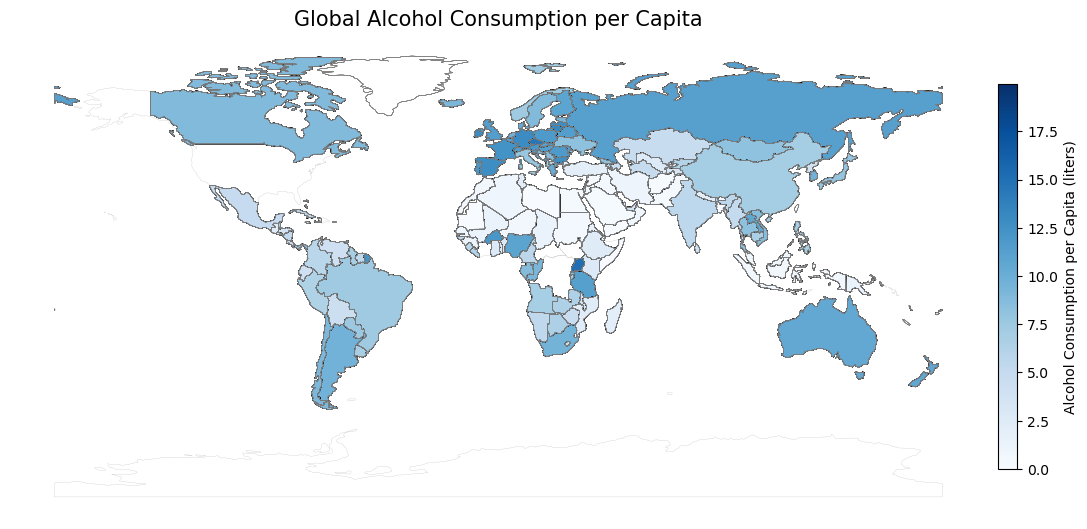

In [45]:
# Set up the plot with specified figure size
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plotting the world boundaries
world.boundary.plot(ax=ax, linewidth=0.10, color='grey')

# Plotting the choropleth map with the alcohol consumption data
choropleth = world.dropna(subset=['alcohol_consumption_per_capita']).plot(
    column='alcohol_consumption_per_capita', 
    ax=ax, 
    legend=True, 
    cmap='Blues',
    edgecolor='black', 
    linewidth=0.25, 
    legend_kwds={
        'label': "Alcohol Consumption per Capita (liters)",
        'orientation': "vertical",
        'shrink': 0.5,
        'pad': 0.01
    }
)

plt.title('Global Alcohol Consumption per Capita', fontdict={'fontsize': '15', 'fontweight': '2'})
ax.set_axis_off()
plt.savefig(f"{graphs_dir}/world_consumption.png")
plt.show()

In [46]:
#  See Global Trends Over Time in ALcohol Use

# Group by year and calculate mean, standard deviation (SD), and standard error (SE)
grouped = df.groupby('year')['alcohol_consumption_per_capita'].agg(['mean', 'std'])
grouped['se'] = grouped['std'] / np.sqrt(grouped['mean'].count())

# Calculate the 95% confidence interval (CI) with 1.96 as the z-score for 95% confidence
grouped['ci_lower'] = grouped['mean'] - 1.96 * grouped['se']
grouped['ci_upper'] = grouped['mean'] + 1.96 * grouped['se']

# Reset index to turn 'year' into a column
pivot_table = grouped.reset_index()

# Display the pivot table
pivot_table

,year,mean,std,se,ci_lower,ci_upper
0,2000,6.068219,4.411837,1.012145,4.084416,8.052023
1,2001,6.001267,4.150199,0.952121,4.135110,7.867424
2,2002,6.001267,4.150199,0.952121,4.135110,7.867424
3,2003,6.001267,4.150199,0.952121,4.135110,7.867424
4,2004,6.001267,4.150199,0.952121,4.135110,7.867424
5,2005,6.130428,4.549673,1.043767,4.084645,8.176210
6,2006,6.001267,4.150199,0.952121,4.135110,7.867424
7,2007,6.001267,4.150199,0.952121,4.135110,7.867424
8,2008,6.001267,4.150199,0.952121,4.135110,7.867424
9,2009,6.001267,4.150199,0.952121,4.135110,7.867424


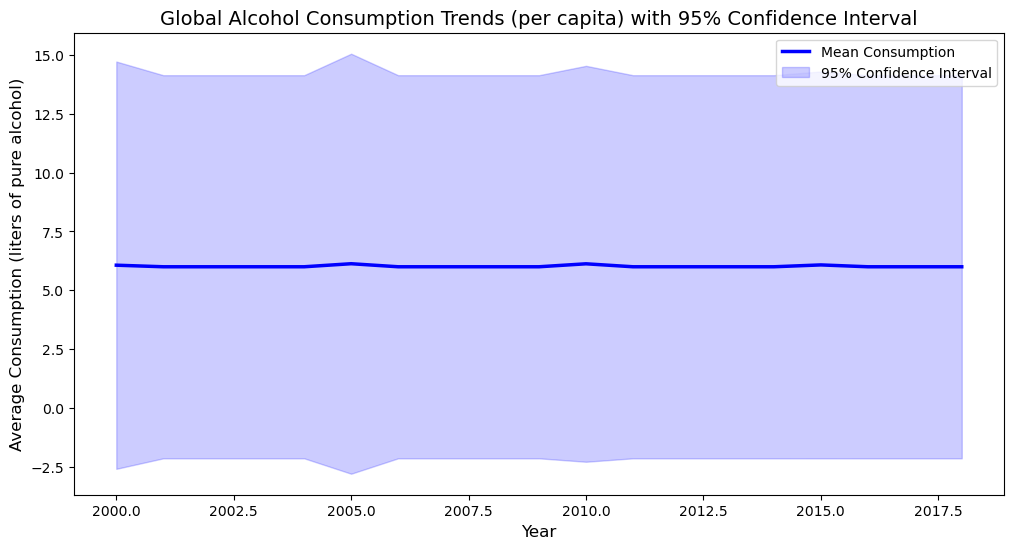

In [47]:
# Hmmm. It seems that global alcohol use did not changed over time.
# Let's visualize it:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate global yearly averages and standard deviation for confidence intervals
global_yearly_mean = df.groupby('year')['alcohol_consumption_per_capita'].mean()
global_yearly_std = df.groupby('year')['alcohol_consumption_per_capita'].std()

# Calculate the 95% confidence interval (1.96 is the z-score for 95% confidence)
ci_upper = global_yearly_mean + (1.96 * global_yearly_std)
ci_lower = global_yearly_mean - (1.96 * global_yearly_std)

# Create the plot with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(global_yearly_mean.index, global_yearly_mean, marker='', color='blue', linewidth=2.5, label='Mean Consumption')
plt.fill_between(global_yearly_mean.index, ci_lower, ci_upper, color='blue', alpha=0.2, label='95% Confidence Interval')

# Enhance the plot with titles and labels
plt.title('Global Alcohol Consumption Trends (per capita) with 95% Confidence Interval', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Consumption (liters of pure alcohol)', fontsize=12)

# Show the legend
plt.legend()

plt.savefig(f"{graphs_dir}/global_consumption_over_2000_2018.png")
plt.show()

In [48]:
# Ok. Global alcohol use remains stable in 2000-2021 years.
# it is in line with WHO data.

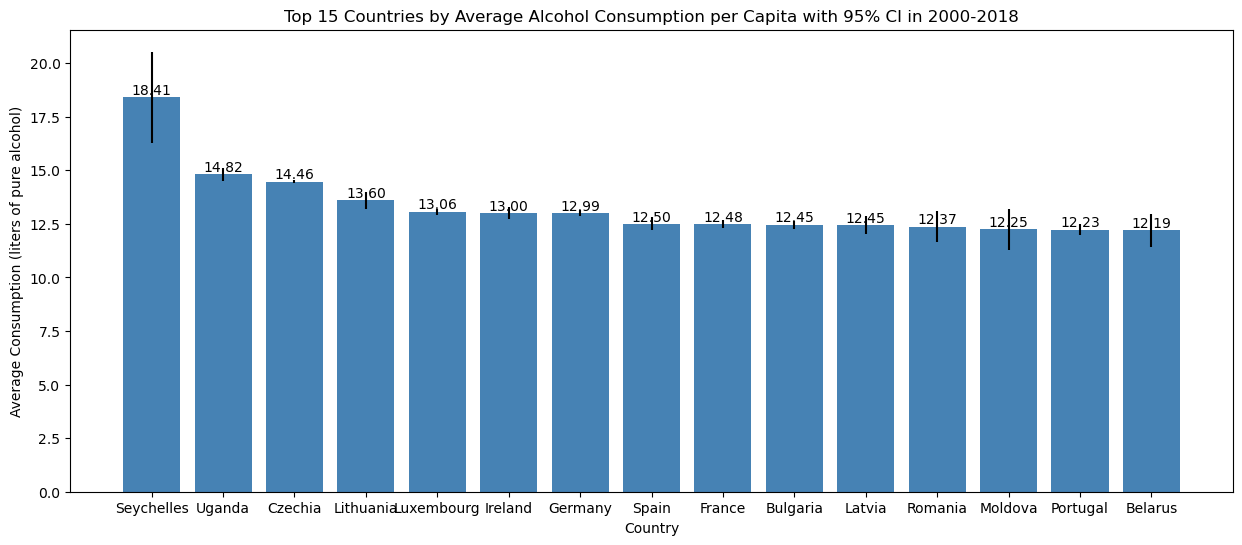

In [49]:
# See contries with highest overall consumption 2000-2018:

# Calculate country means and standard deviation
country_stats = df.groupby('country')['alcohol_consumption_per_capita'].agg(['mean', 'std', 'count'])
top_countries_stats = country_stats.nlargest(15, 'mean')

# Calculate the 95% confidence intervals
ci_95 = 1.96 * (top_countries_stats['std'] / np.sqrt(top_countries_stats['count']))

# Plotting
plt.figure(figsize=(15, 6))
barplot = plt.bar(x=top_countries_stats.index, height=top_countries_stats['mean'], color='steelblue', yerr=ci_95)

# Add average level numbers on top of each bar
for bar in barplot:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

plt.title('Top 15 Countries by Average Alcohol Consumption per Capita with 95% CI in 2000-2018')
plt.xlabel('Country')
plt.ylabel('Average Consumption (liters of pure alcohol)')
plt.savefig(f"{graphs_dir}/top15_consumers.png")
plt.show()


In [50]:
# Ok. Nice. Our data are in line with WHO data on alcohol consumption.
# Seychelles and Uganda really have the highest drinking levels

# https://movendi.ngo/news/2023/05/27/uganda-new-who-data-reveal-worryingly-high-levels-of-alcohol-use/

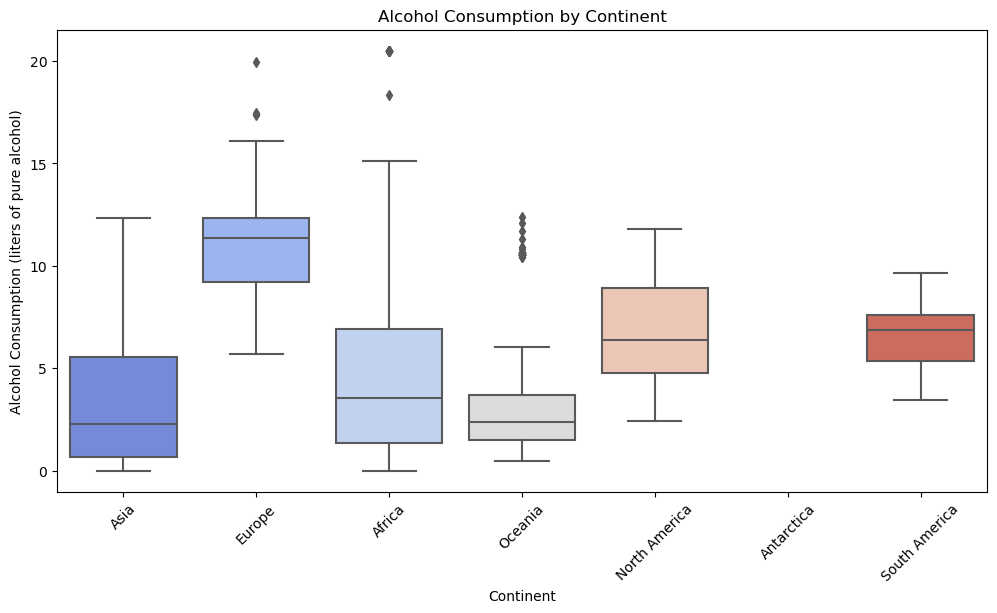

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='alcohol_consumption_per_capita', data=df, palette='coolwarm')
plt.title('Alcohol Consumption by Continent')
plt.xlabel('Continent')
plt.ylabel('Alcohol Consumption (liters of pure alcohol)')
plt.xticks(rotation=45)
plt.savefig(f"{graphs_dir}/consumption_by_continents.png")
plt.show()

In [52]:
# Yep. Europe has the highest overall level of drinking.

# Box plot clearly illustrates it.

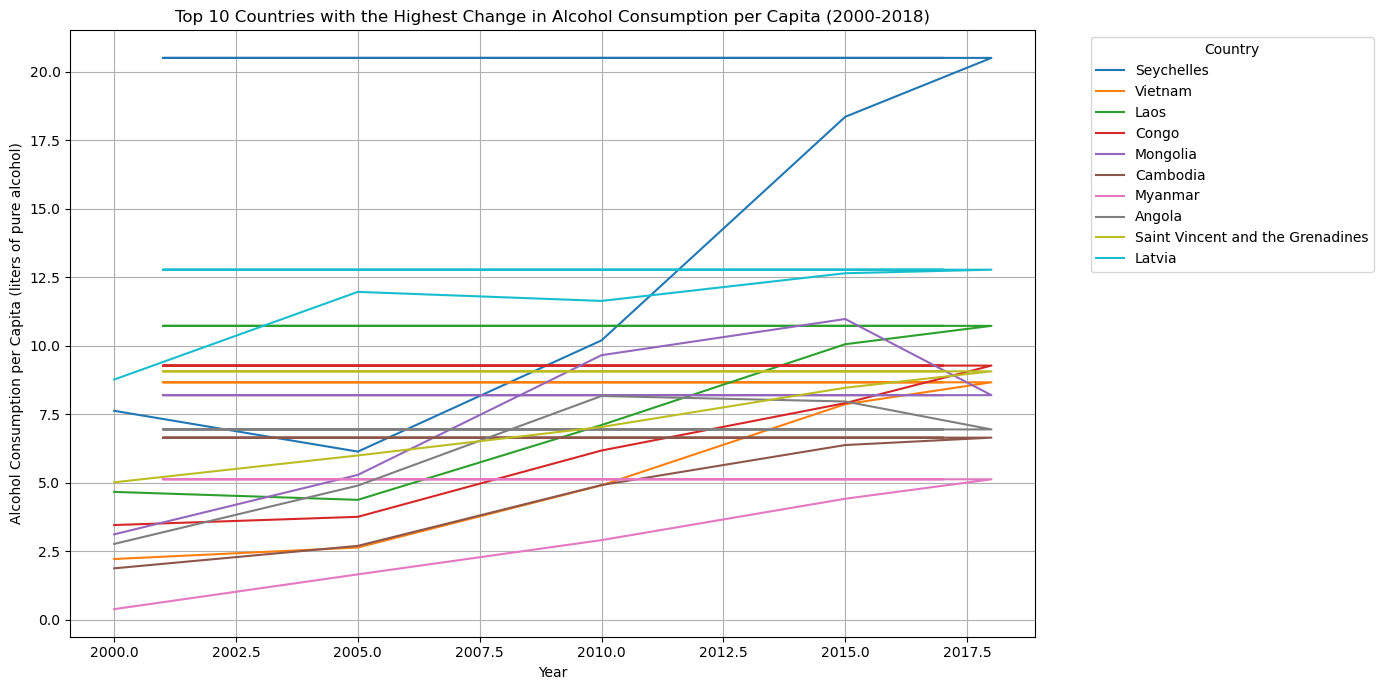

In [53]:
# Calculate the first and last recorded consumption per country
first_year_consumption = df.groupby('country')['alcohol_consumption_per_capita'].first().reset_index()
last_year_consumption = df.groupby('country')['alcohol_consumption_per_capita'].last().reset_index()

# Merge the first and last year data
consumption_change = pd.merge(first_year_consumption, last_year_consumption, on='country', suffixes=('_first', '_last'))

# Calculate the absolute change in consumption
consumption_change['abs_change'] = consumption_change['alcohol_consumption_per_capita_last'] - consumption_change['alcohol_consumption_per_capita_first']

# Sort the countries by the highest absolute change
top_changes = consumption_change.nlargest(10, 'abs_change')

# Now plot the countries with the highest change in alcohol consumption
plt.figure(figsize=(14, 7))

# We will draw one line per country
for country in top_changes['country']:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['alcohol_consumption_per_capita'], marker='', label=country)

plt.title('Top 10 Countries with the Highest Change in Alcohol Consumption per Capita (2000-2018)')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption per Capita (liters of pure alcohol)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [54]:
# Oooops! 

# having multiple lines for the same country within the same year—suggests that there may  be duplicate or inconsistent data

# Find entries with more than one record for the same country and year
duplicates = df[df.duplicated(subset=['country', 'year'], keep=False)]

In [55]:
df

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,Asia
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,Asia
4,Afghanistan,AFG,2002,0.21,1189.784668,22600774.0,Asia
...,...,...,...,...,...,...,...
56849,Zimbabwe,ZWE,2013,4.67,3176.829330,13350378.0,Africa
56850,Zimbabwe,ZWE,2014,4.67,3195.767970,13586710.0,Africa
56851,Zimbabwe,ZWE,2016,4.67,3173.610829,14030338.0,Africa
56852,Zimbabwe,ZWE,2017,4.67,3274.611198,14236599.0,Africa


In [56]:
# Hmmmm there are no duplicates.

# Lets see Table for Seychelles:
df.query('country == "Seychelles" ')

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent
44808,Seychelles,SYC,2000,7.62,18931.150633,80998.0,Africa
44809,Seychelles,SYC,2005,6.13,18273.719660,88652.0,Africa
44810,Seychelles,SYC,2010,10.19,20892.691745,91273.0,Africa
44811,Seychelles,SYC,2015,18.35,25500.486559,94981.0,Africa
44812,Seychelles,SYC,2018,20.50,27342.161652,97094.0,Africa
44823,Seychelles,SYC,2001,20.50,18485.016636,82413.0,Africa
44824,Seychelles,SYC,2002,20.50,18145.851972,84077.0,Africa
44825,Seychelles,SYC,2003,20.50,17271.915558,85807.0,Africa
44826,Seychelles,SYC,2004,20.50,16841.843490,87388.0,Africa
44827,Seychelles,SYC,2006,20.50,19580.901779,89528.0,Africa


In [57]:
# There are still no duplicates.

# Let's try another approach for visualization:

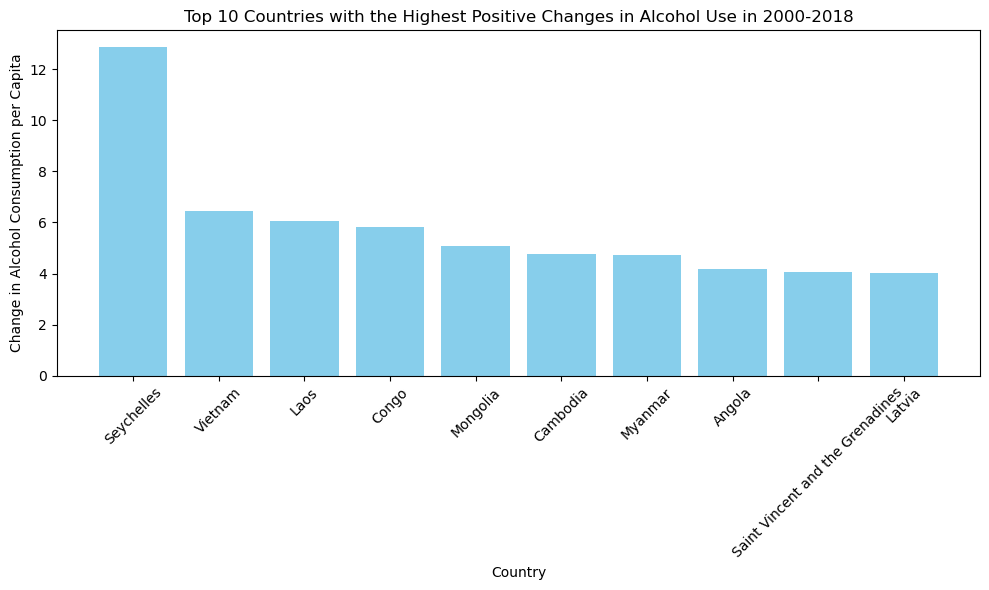

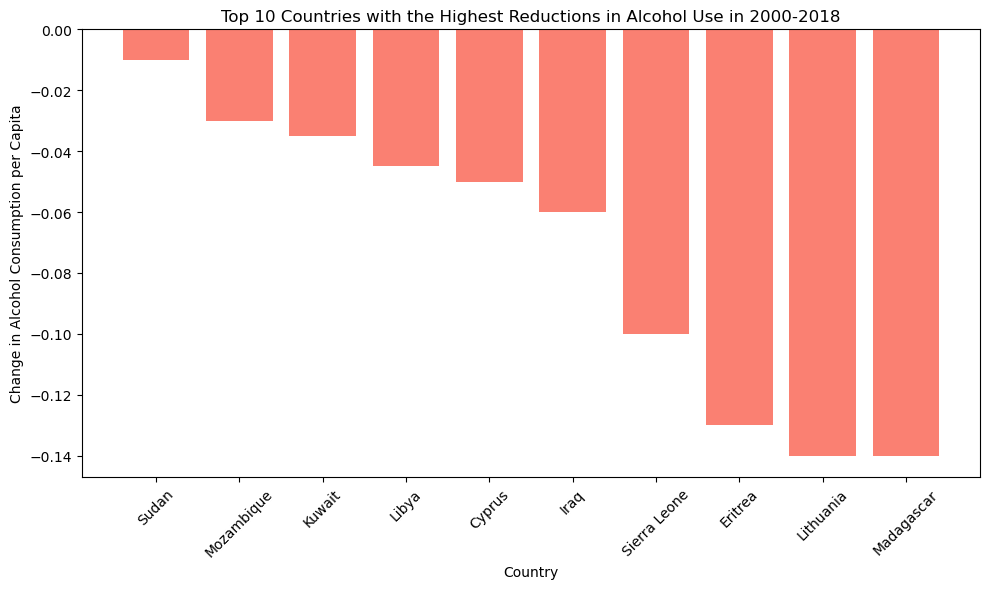

In [58]:
# Let's look at countries with highest changes in drinking levels over the years:



# Calculate the difference in alcohol consumption per capita between the first and last available years for each country
df_diff = df.groupby('country')['alcohol_consumption_per_capita'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()

# Sort countries based on the difference in alcohol consumption per capita
df_diff_sorted = df_diff.sort_values(by='alcohol_consumption_per_capita', ascending=False)

# Separate positive and negative changes
positive_changes = df_diff_sorted[df_diff_sorted['alcohol_consumption_per_capita'] > 0].head(10)
negative_changes = df_diff_sorted[df_diff_sorted['alcohol_consumption_per_capita'] < 0].head(10)

# Plot countries with highest positive changes
plt.figure(figsize=(10, 6))
plt.bar(positive_changes['country'], positive_changes['alcohol_consumption_per_capita'], capsize=5, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Change in Alcohol Consumption per Capita')
plt.title('Top 10 Countries with the Highest Positive Changes in Alcohol Use in 2000-2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{graphs_dir}/countries_with_highest_changes1.png")
plt.show()

# Plot countries with highest reductions
plt.figure(figsize=(10, 6))
plt.bar(negative_changes['country'], negative_changes['alcohol_consumption_per_capita'], capsize=5, color='salmon')
plt.xlabel('Country')
plt.ylabel('Change in Alcohol Consumption per Capita')
plt.title('Top 10 Countries with the Highest Reductions in Alcohol Use in 2000-2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{graphs_dir}/countries_with_highest_changes2.png")
plt.show()

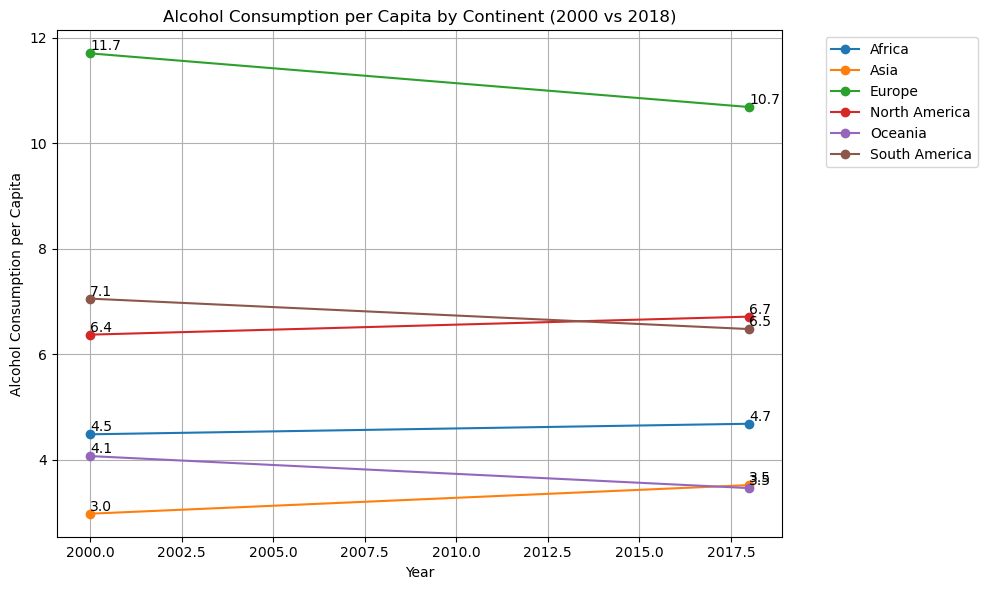

In [59]:
# See changes by continents


df_filtered = df[df['year'].isin([2000, 2018])]
colors = sns.color_palette('tab10', n_colors=len(df['continent'].unique()))
pivot_df = df_filtered.pivot_table(index='continent', columns='year', values='alcohol_consumption_per_capita')
plt.figure(figsize=(10, 6))
for i, continent in enumerate(pivot_df.index):
    plt.plot(pivot_df.columns, pivot_df.loc[continent], marker='o', color=colors[i], label=continent)
    plt.text(pivot_df.columns[0], pivot_df.loc[continent, 2000], f'{pivot_df.loc[continent, 2000]:.1f}', va='bottom', fontsize=10)
    plt.text(pivot_df.columns[-1], pivot_df.loc[continent, 2018], f'{pivot_df.loc[continent, 2018]:.1f}', va='bottom', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Alcohol Consumption per Capita')
plt.title('Alcohol Consumption per Capita by Continent (2000 vs 2018)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{graphs_dir}/change_by_continents.png")
plt.show()


In [60]:
# Nice! European Region reduced alcohol consumption by 10%, but Africa, Asia and North America increased it by 10% each

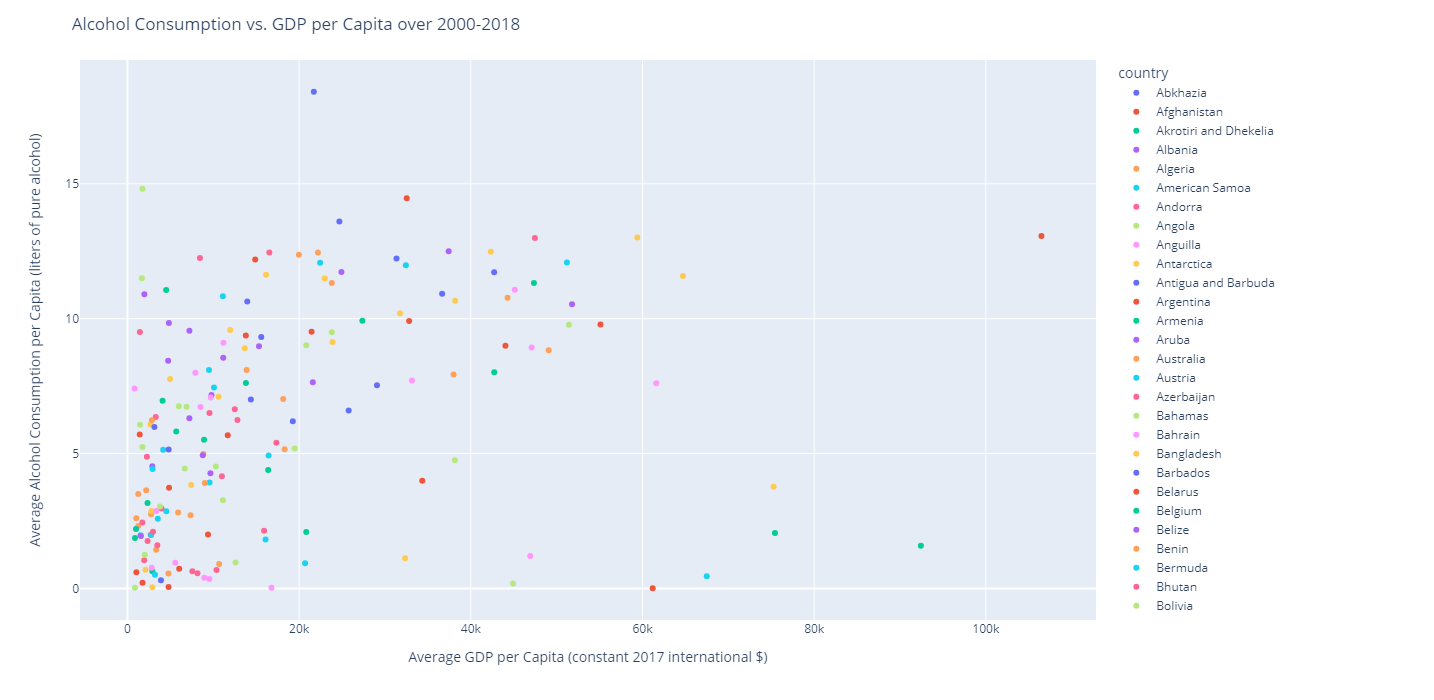

In [99]:
# Ok. Now, Lets do an interactive plot.
# We can visualize relationship between alcohol use level and GDP per capita.

import plotly.express as px

# Calculate average consumption and GDP per capita for each country
avg_consumption = df.groupby('country')['alcohol_consumption_per_capita'].mean()
avg_gdp = df.groupby('country')['gdp_per_capita_ppp'].mean()

# Create a new df with average values
avg_df = pd.DataFrame({'country': avg_consumption.index, 'avg_consumption': avg_consumption.values, 'avg_gdp': avg_gdp.values})

# Plot the average consumption vs. average GDP per capita
fig = px.scatter(avg_df, x="avg_gdp", y="avg_consumption", color="country")
fig.update_layout(
    title="Alcohol Consumption vs. GDP per Capita over 2000-2018",
    xaxis_title="Average GDP per Capita (constant 2017 international $)",
    yaxis_title="Average Alcohol Consumption per Capita (liters of pure alcohol)",
    width=1000,
    height=700 
)

fig.write_html("graphs/alcohol_consumption_vs_gdp.html")

fig.show()

In [62]:
# Ok. Nice. We can interact with this plot above.


# Now, let's see correlation between drinking level and GDP per capita.
# here we need to use Spearman correlation because of non-linear association.

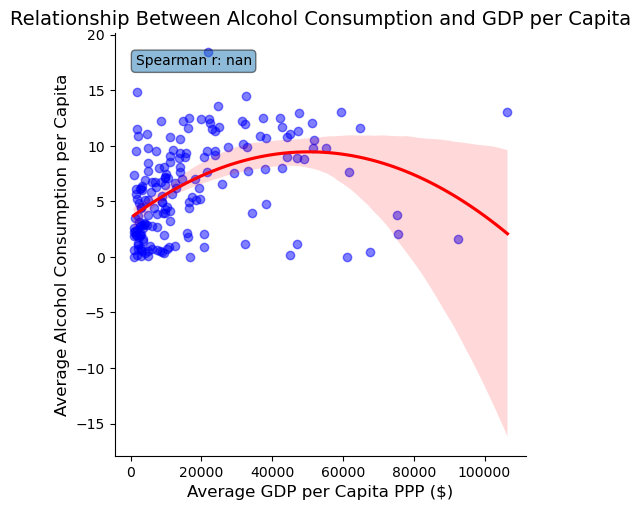

In [63]:
from scipy.stats import spearmanr

# Compute the mean alcohol consumption per capita and GDP per capita for each country
country_means = df.groupby('country').agg({
    'alcohol_consumption_per_capita': 'mean',
    'gdp_per_capita_ppp': 'mean'
}).reset_index()

# Calculate the Spearman correlation coefficient
spearman_coef, _ = spearmanr(country_means['alcohol_consumption_per_capita'], country_means['gdp_per_capita_ppp'])

# Create a scatter plot with a non-linear regression model fit
sns.lmplot(x='gdp_per_capita_ppp', y='alcohol_consumption_per_capita', data=country_means,
           order=2,  # This specifies a non-linear regression (quadratic fit)
           ci=95,  # Confidence interval for the fit set to 95%
           scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})

# Annotate the plot with the Spearman correlation coefficient
plt.annotate(f'Spearman r: {spearman_coef:.1f}', xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', alpha=0.5))

# Set the plot titles and labels
plt.title('Relationship Between Alcohol Consumption and GDP per Capita', fontsize=14)
plt.xlabel('Average GDP per Capita PPP ($)', fontsize=12)
plt.ylabel('Average Alcohol Consumption per Capita', fontsize=12)



plt.show()


In [64]:
# Hmmm. It is not bad. But we can improve this plot:


# 1) do not account NaNs
# 2) using a log scale may help to visualize the relationship
# 3) confidence interval (the shaded area) dips into negative values, which may not be meaningful for alcohol consumption

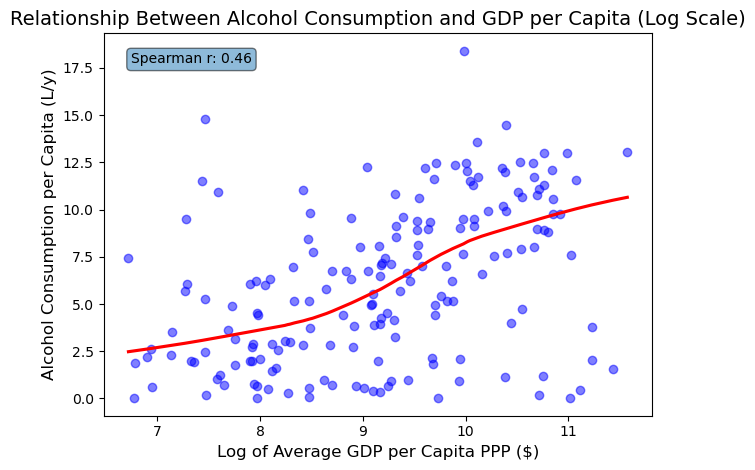

In [65]:
# Compute the mean alcohol consumption per capita and GDP per capita for each country
country_means = df.groupby('country').agg({
    'alcohol_consumption_per_capita': 'mean',
    'gdp_per_capita_ppp': 'mean'
}).dropna()  # Dropping NaNs

# Calculate the Spearman correlation coefficient again after cleaning data
spearman_coef, _ = spearmanr(country_means['alcohol_consumption_per_capita'], country_means['gdp_per_capita_ppp'])

# Log transformation for GDP per capita
country_means['gdp_per_capita_ppp_log'] = np.log1p(country_means['gdp_per_capita_ppp'])

# Create a scatter plot with a non-linear regression model fit using the log of GDP per capita
sns.regplot(x='gdp_per_capita_ppp_log', y='alcohol_consumption_per_capita', data=country_means,
            scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'}, lowess=True)

# Spearman correlation coefficient, checking for NaN
if not np.isnan(spearman_coef):
    plt.annotate(f'Spearman r: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', alpha=0.5))

# Set the plot titles and labels
plt.title('Relationship Between Alcohol Consumption and GDP per Capita (Log Scale)', fontsize=14)
plt.xlabel('Log of Average GDP per Capita PPP ($)', fontsize=12)
plt.ylabel('Alcohol Consumption per Capita (L/y)', fontsize=12)

plt.savefig(f"{graphs_dir}/correlation_alcohol_GDP")
plt.tight_layout()
plt.show()

In [66]:
# Wonderful!

# A curved line (polynomial fit) is fitted to the data points, 
# indicating a non-linear relationship between GDP and alcohol consumption. 
# The trend suggests that as GDP per capita increases, alcohol consumption also tends to increase, 
# but not at a constant rate. Interesting...


In [67]:
# Now, let's append our data with external part -- World Health Organization (WHO)

In [68]:
# Indicator: Alcohol use disorders (12-month prevalence)

# Adults (15+ years) who suffer from disorders attributable to the consumption of alcohol (according to ICD-10: F10.1 Harmful use of alcohol; F10.2 Alcohol dependence) 
# during a given calendar year. 
# Numerator: Number of adults (15+ years) with a diagnosis of F10.1, F10.2 during a calendar year. 
# Denominator: Midyear resident population (15+ years) over the same calendar year. 

# Source: World Health Organization
# Link: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/alcohol-use-disorders-(15-)-12-month-prevalence-(-)-with-95-

In [69]:
def load_who_data(filepath):
    """
    Load and preprocess the WHO data with the correct delimiter.
    
    Parameters:
    - filepath (str): Path to the downloaded WHO data file.
    
    Returns:
    - DataFrame: Preprocessed WHO data.
    """
    # Specify the delimiter as semicolon
    df = pd.read_csv(filepath, delimiter=';')
    # Rename columns if necessary and convert data types
    df.rename(columns=lambda x: x.strip(), inplace=True)  # Strip any extra spaces from column names
    df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert year to numeric
    return df

In [70]:
# Loading new data:
who_df = load_who_data(r"C:\Users\NikitaMitkin\Documents\GitHub\HEL8048\data\who_aud_prevalence_dataset.csv")

In [71]:
# Display the column names for both DataFrames
print("Columns in main DataFrame:", df.columns)
print("Columns in WHO DataFrame:", who_df.columns)

Columns in main DataFrame: Index(['country', 'country_Code', 'year', 'alcohol_consumption_per_capita',
       'gdp_per_capita_ppp', 'population', 'continent'],
      dtype='object')
Columns in WHO DataFrame: Index(['country', 'year', 'aud_prevalence'], dtype='object')


In [72]:
def merge_datasets(df1, df2):
    """
    Merge two datasets on 'country' and 'year' columns ensuring only matched data is merged.
    
    Parameters:
    - df1 (DataFrame): Primary dataset.
    - df2 (DataFrame): WHO data on AUD prevalence.
    
    Returns:
    - DataFrame: Merged dataset with matched records only.
    """
    # Ensure column names are correctly set for merging
    df1['year'] = pd.to_numeric(df1['year'], errors='coerce')  # Convert year to numeric if not already
    merged_df = pd.merge(df1, df2, on=['country', 'year'], how='inner')
    return merged_df


In [73]:
# Perform the merge and see output:

final_df = merge_datasets(df, who_df)
final_df

,country,country_Code,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,continent,aud_prevalence
0,Afghanistan,AFG,2016,0.210,2057.067978,35383028.0,Asia,0.4
1,Albania,ALB,2016,7.170,12291.873377,2886427.0,Europe,5.9
2,Algeria,DZA,2016,0.950,11826.166416,40551398.0,Africa,0.8
3,Andorra,AND,2016,11.020,NaN,77295.0,Europe,5.9
4,Angola,AGO,2016,6.940,7568.998168,28842482.0,Africa,6
...,...,...,...,...,...,...,...,...
167,Uzbekistan,UZB,2016,2.590,6346.334778,31441753.0,Asia,5.9
168,Vanuatu,VUT,2016,2.250,2973.467613,278326.0,Oceania,5.2
169,Yemen,YEM,2016,0.051,NaN,27168210.0,Asia,0.4
170,Zambia,ZMB,2016,6.540,3467.887448,16363449.0,Africa,5.5


In [74]:
# Nice! Now we have data on AUD prevalence with alcohol level use and GDP per catpita for 2016 year!

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         172 non-null    object 
 1   country_Code                    172 non-null    object 
 2   year                            172 non-null    int64  
 3   alcohol_consumption_per_capita  166 non-null    float64
 4   gdp_per_capita_ppp              165 non-null    float64
 5   population                      172 non-null    float64
 6   continent                       172 non-null    object 
 7   aud_prevalence                  172 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.9+ KB


In [76]:
# Transform prevalence from object to float:

final_df['aud_prevalence'] = pd.to_numeric(final_df['aud_prevalence'], errors='coerce')


In [77]:
# Missed values:

final_df.isnull().sum() # ok

country                           0
country_Code                      0
year                              0
alcohol_consumption_per_capita    6
gdp_per_capita_ppp                7
population                        0
continent                         0
aud_prevalence                    3
dtype: int64

In [78]:
# Dropping rows with missing 'aud_prevalence'

final_df.dropna(subset=['aud_prevalence'], inplace=True)

In [79]:
final_df.describe()

,year,alcohol_consumption_per_capita,gdp_per_capita_ppp,population,aud_prevalence
count,169.0,166.000000,163.000000,1.690000e+02,169.000000
mean,2016.0,6.028054,19437.476464,3.737159e+07,5.179882
std,0.0,4.165412,20025.247372,1.515283e+08,3.444467
min,2016.0,0.003000,794.604271,1.611000e+03,0.300000
25%,2016.0,2.315000,4452.254364,2.007882e+06,2.300000
50%,2016.0,5.785000,12403.687142,8.108984e+06,5.700000
75%,2016.0,9.202500,27392.517778,2.392655e+07,6.800000
max,2016.0,20.500000,113035.834714,1.414049e+09,21.200000


Summary Statistics for aud_prevalence:
count    169.000000
mean       5.179882
std        3.444467
min        0.300000
25%        2.300000
50%        5.700000
75%        6.800000
max       21.200000
Name: aud_prevalence, dtype: float64



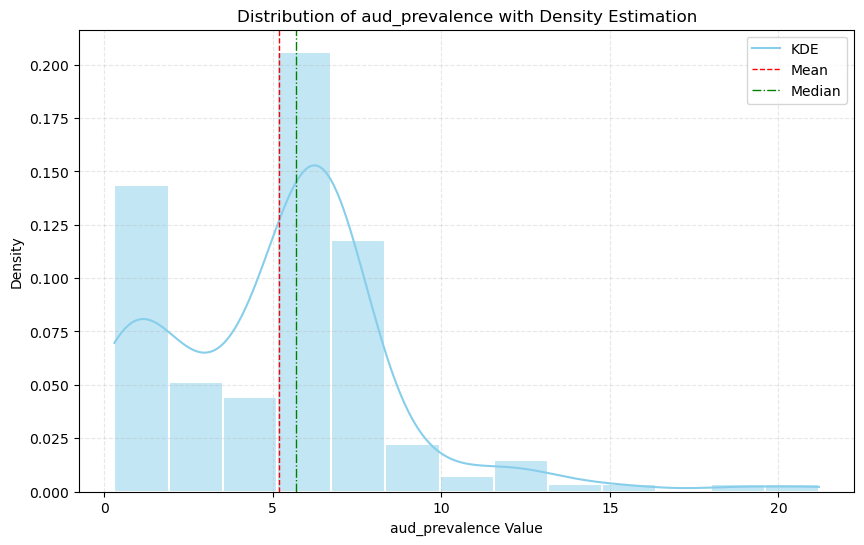

In [80]:
analyzer_who = DataAnalyzer(final_df)
analyzer_who.plot_histogram_with_kde('aud_prevalence')

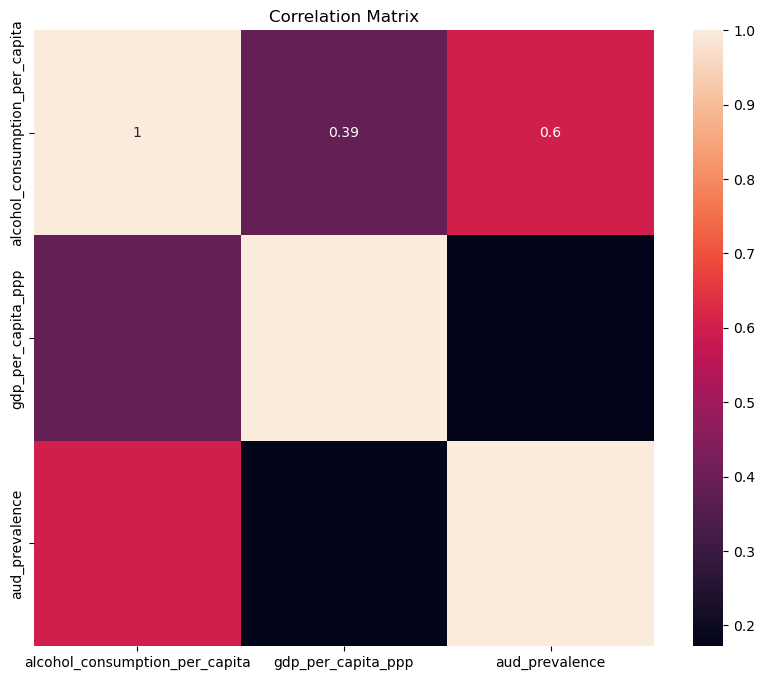

In [81]:
# See correlations:

plt.figure(figsize=(10, 8))
sns.heatmap(final_df[['alcohol_consumption_per_capita', 'gdp_per_capita_ppp', 'aud_prevalence']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [82]:
# Compute the mean alcohol consumption per capita and AUD prevalence for each country
country_means = final_df.groupby('country').agg({
    'alcohol_consumption_per_capita': 'mean',
    'aud_prevalence': 'mean'
}).dropna()  # Dropping NaNs

# Calculate the Spearman correlation coefficient
spearman_coef, _ = spearmanr(country_means['alcohol_consumption_per_capita'], country_means['aud_prevalence'])

print(f"Spearman correlation coefficient: {spearman_coef:.2f}")


Spearman correlation coefficient: 0.66


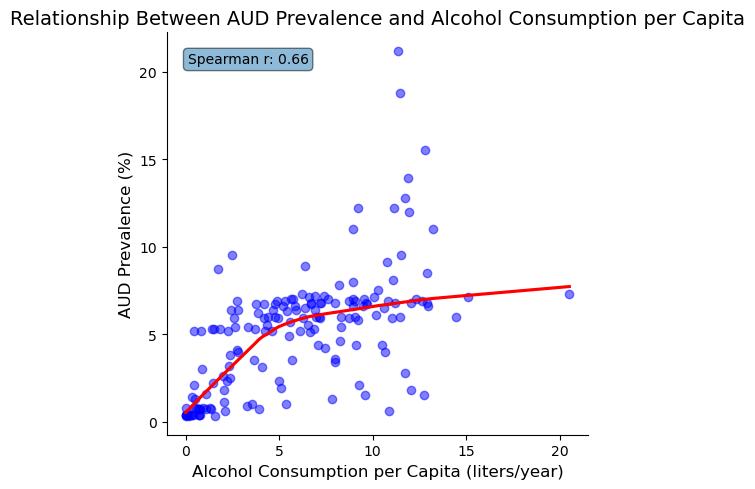

In [83]:
# Create a scatter plot with a non-linear regression model fit (using LOWESS)
sns.lmplot(x='alcohol_consumption_per_capita', y='aud_prevalence', data=country_means,
           scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'}, lowess=True)

if not np.isnan(spearman_coef):
    plt.annotate(f'Spearman r: {spearman_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 ha='left', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', alpha=0.5))

# Set the plot titles and labels
plt.title('Relationship Between AUD Prevalence and Alcohol Consumption per Capita', fontsize=14)
plt.xlabel('Alcohol Consumption per Capita (liters/year)', fontsize=12)
plt.ylabel('AUD Prevalence (%)', fontsize=12)
plt.tight_layout()
plt.savefig(f"{graphs_dir}/correlation_alcohol_AUDprevalence")
plt.show()

In [84]:
# While a positive correlation might indicate that higher alcohol consumption is associated with higher AUD prevalence, 
# the causality cannot be inferred directly from the analysis

In [85]:
# Ok. Nice.

# Now, let's do some analysis.

In [86]:
# Ensure all data is in the correct format
final_df['aud_prevalence'] = pd.to_numeric(final_df['aud_prevalence'], errors='coerce')
final_df['alcohol_consumption_per_capita'] = pd.to_numeric(final_df['alcohol_consumption_per_capita'], errors='coerce')
final_df['gdp_per_capita_ppp'] = pd.to_numeric(final_df['gdp_per_capita_ppp'], errors='coerce')

In [87]:
# Drop  rows with missing data for simplicity in this initial model
analysis_df = final_df.dropna(subset=['aud_prevalence', 'alcohol_consumption_per_capita', 'gdp_per_capita_ppp'])

In [88]:
#  Simple Linear Regression to Explore Initial Associations
import statsmodels.api as sm

# Fit a simple linear regression model
X_simple = sm.add_constant(analysis_df['alcohol_consumption_per_capita'])  # adding a constant
y = analysis_df['aud_prevalence']

model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_prevalence   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     88.37
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.50e-17
Time:                        14:26:02   Log-Likelihood:                -396.14
No. Observations:                 162   AIC:                             796.3
Df Residuals:                     160   BIC:                             802.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [89]:
# Nice. But what does it mean?

# R-squared (0.356): Explains 35.6% of the variance in AUD prevalence, indicating a moderate relationship.
# Adjusted R-squared (0.352): Slightly lower than R-squared, adjusted for the number of predictors.
# F-statistic (88.37): The model fit is statistically significant, with a very low probability (5.50e-17) that the fit is by chance.
# coef for alcohol_consumption_per_capita (0.5006): For every one liter increase in alcohol consumption per capita, AUD prevalence increases by 0.5006%.
# P-value for alcohol_consumption_per_capita (<0.001): The effect of alcohol consumption on AUD prevalence is statistically significant.
# Confidence Interval: Indicates that we are 95% confident that the interval [0.395, 0.606] contains the true coefficient.
# Durbin-Watson (1.739): The value is close to 2, suggesting minimal autocorrelation in the residuals.
# Omnibus/Prob(Omnibus): Test for the normality of the residuals; the low p-value suggests the residuals are not normally distributed.
# Jarque-Bera: Another test indicating non-normality in the residuals.
# Skew (0.929): Positive skew indicates a long tail on the right side of the distribution of residuals.
# Kurtosis (6.769): Indicates heavy tails compared to a normal distribution, suggesting outliers or anomalies.


In [90]:
# Adding GDP per capita to the model
X_adjusted = sm.add_constant(analysis_df[['alcohol_consumption_per_capita', 'gdp_per_capita_ppp']])
model_adjusted = sm.OLS(y, X_adjusted).fit()
print(model_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_prevalence   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     44.71
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           3.93e-16
Time:                        14:26:02   Log-Likelihood:                -395.62
No. Observations:                 162   AIC:                             797.2
Df Residuals:                     159   BIC:                             806.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [91]:
# Output interpretation for Model 2:

# R-squared (0.360): Only a slight improvement in variance explanation compared to Model 1.
# Adjusted R-squared (0.352): Adjusted for two predictors, showing a stable explanation of variance as in Model 1.
# F-statistic (44.71): The model remains significant, although the statistic has decreased, indicating that GDP per capita does not add much explanatory power.
# coef for alcohol_consumption_per_capita (0.5233): A slightly higher coefficient compared to Model 1, reinforcing the impact of alcohol consumption on AUD.
# coef for gdp_per_capita_ppp (-1.21e-05): The effect is minimal and not statistically significant (P-value: 0.313).
# Confidence Interval for gdp_per_capita_ppp: Includes zero, confirming the non-significance of GDP's impact.
# Durbin-Watson (1.731): Similar interpretation as in Model 1, with minimal autocorrelation.
# Condition Number (5.12e+04): High, indicating potential multicollinearity issues, likely due to GDP per capita not providing independent information.


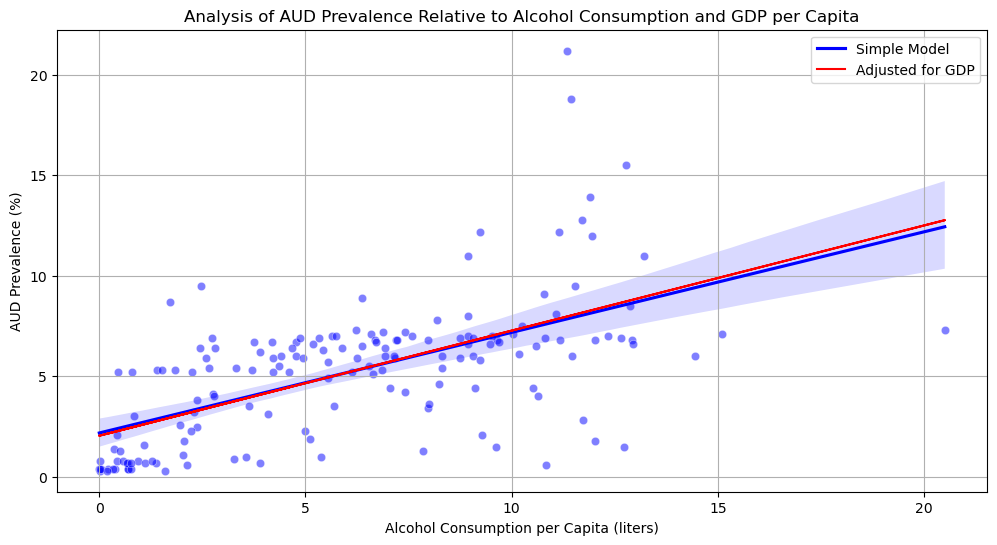

In [92]:
# Visualization of our regression:

analysis_df = final_df.dropna(subset=['aud_prevalence', 'alcohol_consumption_per_capita', 'gdp_per_capita_ppp']).copy()

# Define a function to calculate the adjusted predictions
def adjusted_pred(x, avg_gdp):
    return model_adjusted.params[0] + model_adjusted.params[1] * x + model_adjusted.params[2] * avg_gdp

# Calculate the average GDP per capita
avg_gdp_per_capita = analysis_df['gdp_per_capita_ppp'].mean()

# Calculate adjusted predictions using .loc to ensure direct modification
analysis_df.loc[:, 'adjusted_pred'] = analysis_df['alcohol_consumption_per_capita'].apply(lambda x: adjusted_pred(x, avg_gdp_per_capita))

# Plotting as before
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analysis_df, x='alcohol_consumption_per_capita', y='aud_prevalence', color='blue', alpha=0.5)
sns.regplot(data=analysis_df, x='alcohol_consumption_per_capita', y='aud_prevalence', scatter=False, label='Simple Model', color='blue')
plt.plot(analysis_df['alcohol_consumption_per_capita'], analysis_df['adjusted_pred'], color='red', label='Adjusted for GDP')
plt.xlabel('Alcohol Consumption per Capita (liters)')
plt.ylabel('AUD Prevalence (%)')
plt.title('Analysis of AUD Prevalence Relative to Alcohol Consumption and GDP per Capita')
plt.legend()
plt.grid(True)
plt.savefig(f"{graphs_dir}/linear_regression")
plt.show()

In [93]:
# Well done!
# It was an interesting trip.

# We cleaned and processed the dataset,
# then we visualized alcohol level use in global, continent and country perspective.
# We also illustrated countries with highest change in drinking levels (positive and negative).
# The notebook uses functions and classess as well.
# We observed changed in drinking levels over time by continents.
# Then we loaded external dataset, and merged two data frames
# We used linear regression to assess associations between drinking volume, GPD and alcohol use disorder prevalence

# Conclusions:
# 1) global alcohol consumption level remained stable over 2000-2018 at around 6 L/year per capita
# 2) European Region reduced alcohol consumption by 10%, but Africa, Asia and North America increased it by 10% each
# 3) Alcohol drinking level has mild but signficant correaltion with alcohol-use disorder prevalence
# 4) GDP per capita doesnt play a signficiant role in relationship between AUD prevalence and drinking level

# We sucessfully completed our initial objectivess.

In [1]:
!conda env export > environment.yml